## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>ĐÁP ÁN LAB 11 12 13</center>

# LAB 11. THUẬT TOÁN TÌM ĐƯỜNG (1)

### Bài 1. Tìm Đường

In [2]:
def traverse(graph, current_island, island_b, visited, path):
    
    # check that the current island is visited
    visited.add(current_island)
    
    # append to the current path
    path.append(current_island)
    
    # stop recursion if reached B
    if current_island == island_b:
        return True
    
    # traverse adjacent islands
    for vertex in graph[current_island]:
        if vertex not in visited:
            if traverse(graph, vertex, island_b, visited, path):
                return True  # stop checking other paths if reached B
    
    # remove current island from path as not found B
    path.pop(-1)
    return False


def find_path(graph, island_a, island_b):
    
    # init empty path
    path = []
    
    # start finding from A
    traverse(graph, island_a, island_b, set(), path)
    
    return path

### Bài 2. Tạo Mê Cung

In [3]:
import matplotlib.pyplot as plt

plt.style.use('default')

def plot_maze(vertical, horizontal, fig_height=8):

    # init height & width
    height = len(vertical)
    width = len(vertical[0])
    
    # init figure
    fig = plt.figure(figsize=(fig_height*2, fig_height))
    fig.patch.set_visible(False)

    # draw maze borders
    for row in range(height):
        for col in range(width):
            if vertical[row][col]:
                plt.plot((col, col), (row, row+1), color='white')
            if horizontal[row][col]:
                plt.plot((col, col+1), (row, row), color='white')

    # draw surrounding borders on the right & bottom
    plt.plot((width, width), (0, height-1), color='white')
    plt.plot((0, width), (height, height), color='white')

    # styling the plot
    ax = plt.gca()
    ax.set_facecolor((0, 0, 0))
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.xticks([])
    plt.yticks([])
    
    # add arrows
    plt.arrow(0, 0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    plt.arrow(width-0.8, height-0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    
    plt.show()

In [1]:
# SOLUTION
from IPython import display
import time
import random


def generate_maze_recursive(prev_row, prev_col, row, col, width, height, visited, vertical, horizontal):
    
    # mark current cell as visited
    visited[row][col] = True
    
    # delete border between current cell and previous cell
    if prev_row == row:
        vertical[row][max(prev_col, col)] = False
    if prev_col == col:
        horizontal[max(prev_row, row)][col] = False
    
    # show the process of creating the maze - USED FOR DEMONSTRATION
    time.sleep(0.1)
    display.clear_output(wait=True)
    plot_maze(vertical, horizontal)
    
    # randomize the order of neighbor cells to traverse
    neighbors = [(row-1, col), (row, col+1), (row+1, col), (row, col-1)]
    random.shuffle(neighbors)
    
    # traverse neight cells
    for i, j in neighbors:
        # check if reached maze limits
        if i != -1 and i != height and j != -1 and j != width and not visited[i][j]:
            generate_maze_recursive(row, col, i, j, width, height, visited, vertical, horizontal)
    

# generate vertical and horizontal borders of a maze
def generate_maze(height, seed=2021):
    
    # init random seed
    random.seed(seed)
    
    # init needed variables
    width = height * 2
    visited = [[False]*width for _ in range(height)]
    vertical = [[True]*width for _ in range(height)]
    horizontal = [[True]*width for _ in range(height)]
    
    # start generating maze
    start_cell = {'x': 0, 'y': 0}
    previous_cell = {'x': 0, 'y': -1}
    generate_maze_recursive(previous_cell['x'], previous_cell['y'], start_cell['x'], start_cell['y'],
                            width, height, visited, vertical, horizontal)
    
    return vertical, horizontal

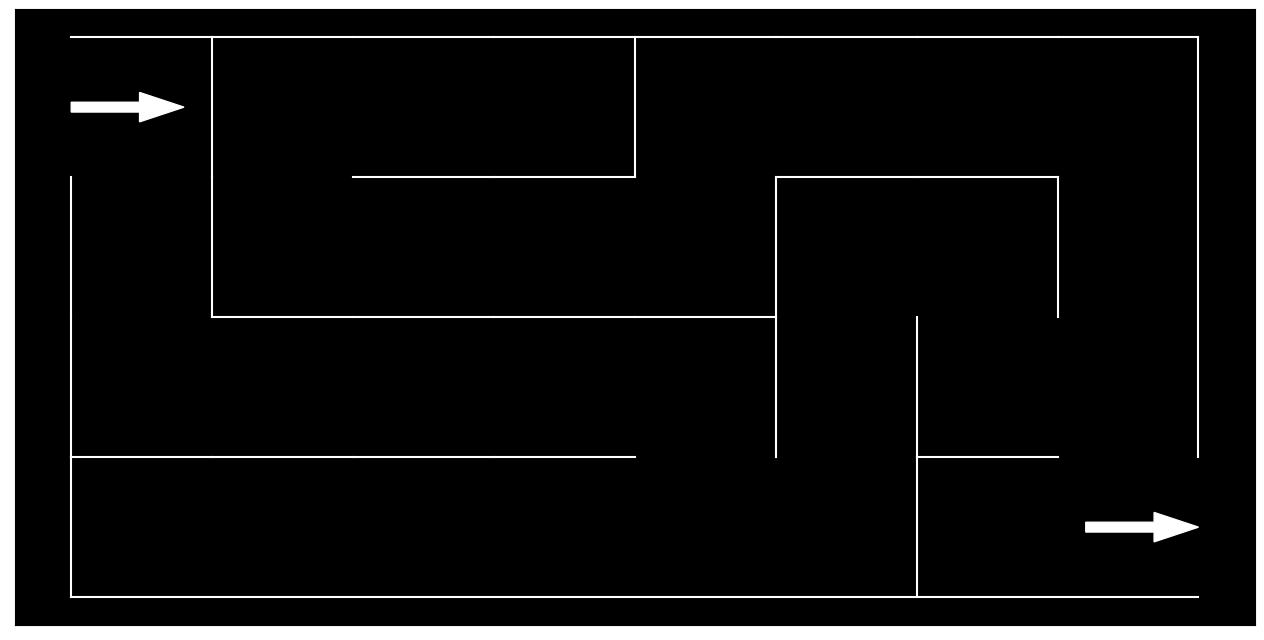

([[False, True, False, False, True, False, False, False],
  [True, True, False, False, False, True, False, True],
  [True, False, False, False, False, True, True, False],
  [True, False, False, False, False, False, True, False]],
 [[True, True, True, True, True, True, True, True],
  [False, False, True, True, False, True, True, False],
  [False, True, True, True, True, False, False, False],
  [True, True, True, True, False, False, True, False]])

In [4]:
generate_maze(4, seed=42)